In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

cv2 默认使用 BGR 的颜色方案
（255， 0， 0）→ BLUE
（0， 255， 0）→ GREEN
（0， 0， 255）→ RED

In [2]:
img = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
    [[255, 255, 255], [128, 128, 128], [0, 0, 0]],
], dtype=np.uint8)

# 使用 matplotlib 储存
plt.imsave('img_plt.jpg', img)

# 使用 cv 储存
cv2.imwrite('img_cv2.jpg', img)


True

In [6]:
img = cv2.imread('test.jpg')
print(img.shape)
gray_img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
print(gray_img.shape)

# 单通道图片默认保存的时候，复制到三个通道
cv2.imwrite('gray_img.jpg', gray_img)
reload_gray = cv2.imread('gray_img.jpg')
print(reload_gray.shape)

# 保存的时候可以控制质量
# jpg （0-100）
cv2.imwrite('test_qs.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 80))
# png (0-9)
cv2.imwrite('test_qs.jpg', img, (cv2.IMWRITE_PNG_COMPRESSION, 3))

(100, 100, 3)
(100, 100)
(100, 100, 3)


True

In [7]:
# 通过cv2.cvtColor把图像从BGR转换到HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# H空间中，绿色比黄色的值高一点，所以给每个像素+15，黄色的树叶就会变绿
turn_green_hsv = img_hsv.copy()
turn_green_hsv[:, :, 0] = (turn_green_hsv[:, :, 0]+15) % 180
turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('turn_green.jpg', turn_green_img)

# 减小饱和度会让图像损失鲜艳，变得更灰
colorless_hsv = img_hsv.copy()
colorless_hsv[:, :, 1] = 0.5 * colorless_hsv[:, :, 1]
colorless_img = cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('colorless.jpg', colorless_img)

# 减小明度为原来一半
darker_hsv = img_hsv.copy()
darker_hsv[:, :, 2] = 0.5 * darker_hsv[:, :, 2]
darker_img = cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('darker.jpg', darker_img)

True

TypeError: only size-1 arrays can be converted to Python scalars

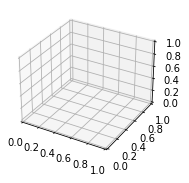

In [8]:
# 分通道计算每个通道的直方图
hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])

# 定义Gamma矫正的函数
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)

# 执行Gamma矫正，小于1的值让暗部细节大量提升，同时亮部细节少量提升
img_corrected = gamma_trans(img, 0.5)
cv2.imwrite('gamma_corrected.jpg', img_corrected)

# 分通道计算Gamma矫正后的直方图
hist_b_corrected = cv2.calcHist([img_corrected], [0], None, [256], [0, 256])
hist_g_corrected = cv2.calcHist([img_corrected], [1], None, [256], [0, 256])
hist_r_corrected = cv2.calcHist([img_corrected], [2], None, [256], [0, 256])

# 将直方图进行可视化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

pix_hists = [
    [hist_b, hist_g, hist_r],
    [hist_b_corrected, hist_g_corrected, hist_r_corrected]
]

pix_vals = range(256)
for sub_plt, pix_hist in zip([121, 122], pix_hists):
    ax = fig.add_subplot(sub_plt, projection='3d')
    for c, z, channel_hist in zip(['b', 'g', 'r'], [20, 10, 0], pix_hist):
        cs = [c] * 256
        ax.bar(pix_vals, channel_hist, zs=z, zdir='y', color=cs, alpha=0.618, edgecolor='none', lw=0)

    ax.set_xlabel('Pixel Values')
    ax.set_xlim([0, 256])
    ax.set_ylabel('Channels')
    ax.set_zlabel('Counts')

plt.show()